# Gráficos com Matplotlib

Matplotlib é uma vasta biblioteca que permite criar gráficos estáticos, animados e interativos em Python. Com um pouquinho de capricho, podemos fazer gráficos com qualidade de artigo científico. Vamos ver neste notebook como ele funciona. Depois de terminar este tutorial, veja alguns [gráficos de exemplo](https://matplotlib.org/stable/gallery/index.html) com código fonte. Este documento é baseado nos exemplos dados pelo matplotlib em sua [documentação](https://matplotlib.org/stable/index.html). Alguns trechos de código foram copiados ou adaptados da documentação, que são de código aberto, com direitos autorais de _The Matplotlib development team_ (2018).

## Inicialização

Primeiramente, precisamos importar o pacote da interface principal, o `pyplot`. Vamos importar também a o pacote numérico `numpy`, que é usad internamente pelo matplotlib (e praticamente qualquer outro programa que iremos usar ou escrever).

Veja que demos os apelidos `plt` e `np` para deixar o código mais compacto. os _imports_ geralmente devem ser feitos no começo do programa.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Vamos também escolher um [estilo](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html), e modificar a fonte padrão.

In [2]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

## O exemplo mais simples de todos

Os gráficos do matplotlib são desenhados em objetos da classe `Figure`, que chamaremos de figuras. Uma figura podem aparecer em uma janela, embutida num notebook, ou salva em arquivo. Cada figura pode ter um ou mais conjunto de eixos (que são objetos da classe `Axes`). É nos eixos que desenhamos pontos em termos de coordenadas $x,y$, ou coodenadas polares, ou $x,y,z$ para eixos 3-d, etc.

A forma mais simples de criar uma figura e eixos é usando a função `plt.subplots()`. Com isso podemos usar a função `Axes.plot()` para desenhar alguma coisa nos eixos:

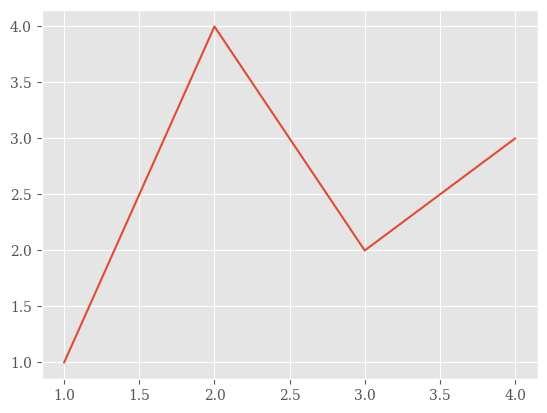

In [3]:
fig, ax = plt.subplots()  # Cria uma figura com um único Axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Desenha alguns pontos nos eixos.
plt.show()

Este é o jeito recomendado de desenhar, ou plotar, gráficos no matplotlib. Uma forma alternativa que é muito usada é chamar diretamente a função `plt.plot()`. Esta função plota os dados nos eixos _atuais_ (os mais recentemente criados), ou cria eixos e figura se estes ainda não existem. É uma função _de conveniência_, para fazer gráficos rápidos. Existem várias outras funções dentro do módulo `plt` com esta finalidade.

O exemplo anterior pode ser escrito simplesmente como:

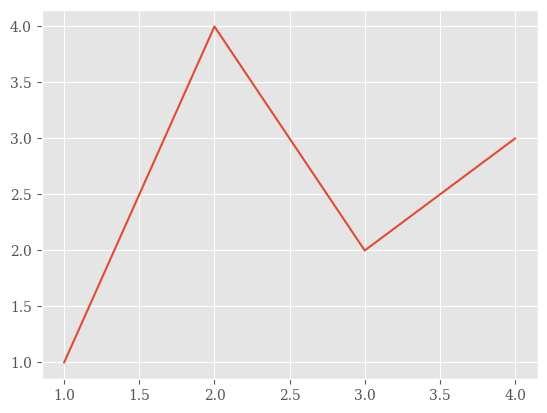

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.show()


### Forma obsoleta

Em exemplos antigos podemos encontrar o uso da interface `pylab`, importada da forma `from pylab import *`. Isto importa tudo de dentro do pacote `pylab`, e tudo que faz parte da biblioteca `numpy`. Assim era possível fazer algo do tipo:

```python
from pylab import *
x = linspace(0, 2, 100)
plot(x, x, label='linear')
...
```

Isto foi feito de forma a emular o comportamento do MATLAB. De qualquer jeito, este é um modo obsoleto de trabalhar com `numpy` e `matplotlib`, não deve ser usada em programas novos.
</p>
</div>

## Anatomia de uma figura

Vamos olhar agora com mais detalhes quais os componentes de uma figura do matplotlib.

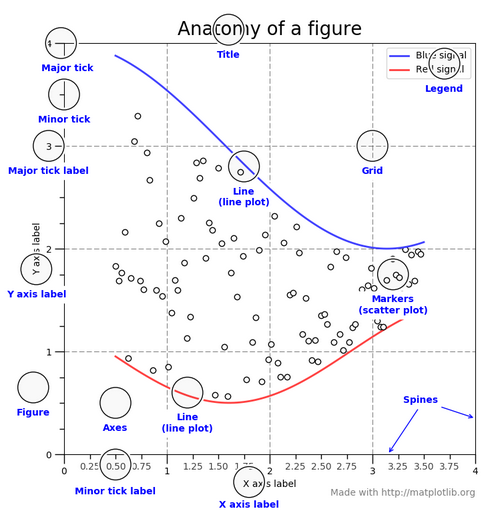

### `Figure`

A figura inteira. Ela organiza e coordena todos os seus filhos `Axes`, uma variedade enorme de _artistas_ (títulos, legendas, etc.) e a tela. Uma figura pode ter um número qualquer de `Axes`, mas geralmente tem só um.

A forma mais simples de fazer uma figura é como vimos acima, com `plt`.

```python
   fig = plt.figure()  # uma figura vazia e sem Axes
   fig, ax = plt.subplots()  # uma figura com um Axes
   fig, axs = plt.subplots(2, 2)  # Uma figura com uma grade de 2x2 Axes
```

É conveniente criar os eixos com a figura, mas é possível adicionar eixos novos para fazer figuras mais complexas.

### `Axes`

Isto é o que você deve imaginar como um _plot_, é a região da figura que vai conter os dados a serem desenhados. Um objeto `Axes` contém 2 (ou 3 em `Axes` 3-d) `Axis`, que são os eixos ordenados individuais. A nomenclatura aqui fica um pouco confusa, mas com o tempo vai ficar mais claro. Os `Axis` cuidam dos limites dos dados, dos retículos (ou _tick marks_) e podem ter etiquetas (_labels_).

Existem métodos de `Axes` para cuidar dos atributos mais importantes de seus `Axis`. Por exemplo:

```python
ax.set_xlim(x1, x2) # Limites do plot na direção x
ax.set_ylim(y1, y2) # Limites do plot na direção y

ax.set_xlabel(texto) # Etiqueta do eixo x
ax.set_ylabel(texto) # Etiqueta do eixo y

```

### `Artist`

Basicamente tudo que aparece numa figura é um `Artist`, ou artista.
Isso inclui os eixos, texto, linhas, polígonos e coleções de objetos. Quando uma figura é _renderizada_, todos os artistas são desenhados na tela. Artistas são um mecanismo interno das figuras, mas ocasionalmente precisamos tratar diretamente com eles quando queremos desenhar manualmente na figura (por exemplo, circular uma região do gráfico).

## Tipos de dados de entrada para funções de plotagem

Todas as funções que plotam dados esperam que estes dados estejam numa forma compatível com `np.array`, ou simplesmente arrays. Isso inclui os próprios `np.array`, arrays mascarados (`np.ma.masked_array`). Como vimos nos exemplos acima, `list`s são convertidos automaticamente para arays.

Como vamos usar `numpy` em nossos programas, ou listas de vez em quando, isso não será um problema.

Vamos então ver um exemplo de um gráfico completo. Você pode modificar as funções, adicionar novas, ou tentar modificar os parâmetros do gráfico.

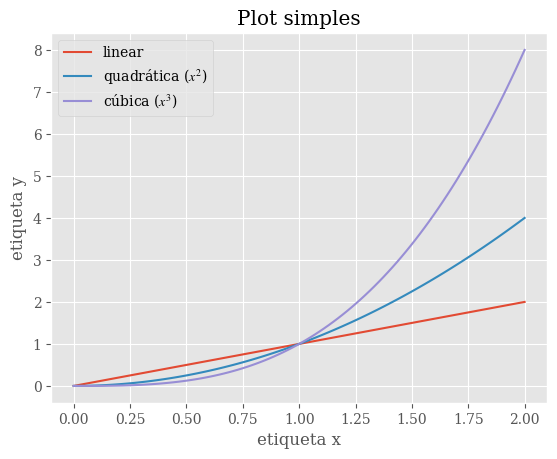

In [5]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots()  # Cria uma figura e um Axes
ax.plot(x, x, label='linear')  # Plota alguns dados no Axes
ax.plot(x, x**2, label='quadrática ($x^2$)')  # Plota mais dados no Axes...
ax.plot(x, x**3, label='cúbica ($x^3$)')  # ... E mais um pouco.
ax.set_xlabel('etiqueta x')  # Adiciona uma etiqueta ao eixo x do Axes
ax.set_ylabel('etiqueta y')  # Adiciona uma etiqueta ao eixo y do Axes
ax.set_title('Plot simples')  # Adiciona um título ao Axes
ax.legend()  # Adiciona um quadro de legenda
plt.show()

Veja que os limites e os retículos são automáticos. Compare com a figura da anatomia de uma figura, e veja quem é o que.

## Formatando o estilo do seu gráfico

O matplotlib escolhe automaticamente a cor e o formato do plot. Podemos escolher manualmente o estilo de plot que queremos. No exemplo abaixo, vamos fazer o plot com círculos vermelhos, passando um argumento extra `'ro'`. Veja a descrição desta string de formato na documentação (usando a janela _contextual help_ ou fazendo `ax.plot?` numa célula). Aproveitando o momento, descubra o que faz `ax.axis()`.

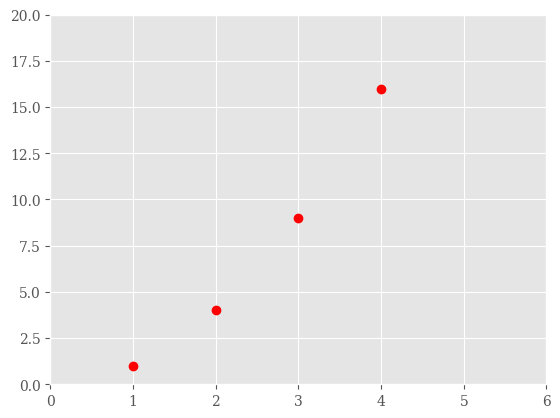

In [6]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
ax.axis([0, 6, 0, 20])
plt.show()

Mais alguns exemplos:

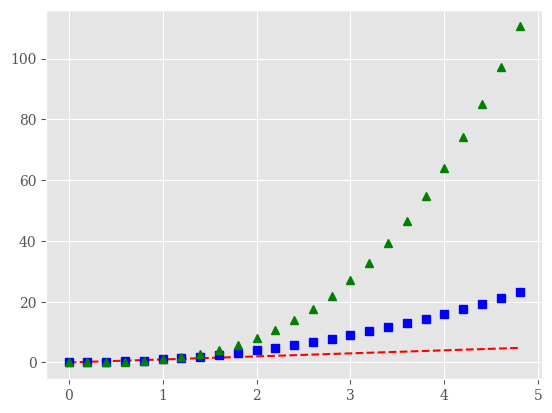

In [7]:
t = np.arange(0., 5., 0.2)

# tracejado vermelho, quadrados azuis, triângulos verdes.
fig, ax = plt.subplots()
ax.plot(t, t, 'r--')
ax.plot(t, t**2, 'bs')
ax.plot(t, t**3, 'g^')
plt.show()

## Linhas e marcadores

Os plots são formados por linhas e marcadores. As strings de formato são uma forma fácil de especificar algumas características destes componentes. Para ter mais controle sobre o formato das linhas e marcadores, podemos especificar argumentos (_keyword arguments_, ou _kwargs_) na chamada a `plot()`. veja abaixo alguns dos mais comuns.

| Propriedade            | Tipo                            | Descrição                                |
|:-----------------------|:--------------------------------|:-----------------------------------------|
| alpha                  | float                           | Transparência                            |
| antialiased ou aa      | bool                            | Suavizada                                |
| color ou c             | cor matplotlib                  | Cor da linha                             |
| label                  | string                          | Etiqueta que aparece na legenda          |
| linestyle or ls        | `'-'` `'--'` `'-.'` `':'` etc. | Contínua, tracejada, pontilhada, etc.    |
| linewidth or lw        | float                           | Espessura da linha                       |
| marker                 | `'+'` `'o'` `','` `'.'` etc.    | Tipo de marcador                         |
| markeredgecolor or mec |cor matplotlib                   | Espessura do contorno do marcador        |
| markeredgewidth or mew | float                           | Cor do contorno do marcador              |
| markerfacecolor or mfc | cor matplotlib                  | Cor do marcador                          |
| markersize or ms       | float                           | Tamanho do marcador (área)               |
| visible                | bool                            | Ativa o desativa a visibilidade da linha |
| zorder                 | int                             | Ordem em que a linha é desenhada

As cores em matplotlib podem ser especificadas [por nome](https://matplotlib.org/stable/gallery/color/named_colors.html). Veja mais opções na [documentação de cores](https://matplotlib.org/stable/tutorials/colors/colors.html). Para uma lista completa de propriedades de linhas e marcadores, veja a documentação da função `plot()`.

## Trabalhando com múltiplas figuras e `Axes`

Em algumas situações pode ser mais interessante desenhar os gráficos em subplots separados na mesma figura, ao invés de fazê-los sobrepostos num único axes como vimos acima. Podemos gerar uma grade de axes usando a própria função `plt.subplots()`. A figura abaixo foi feita usando dois _subplots_.

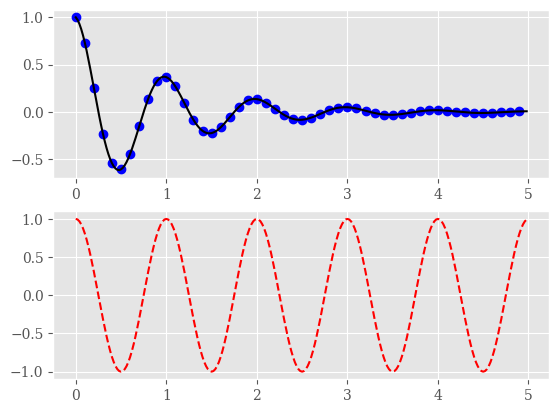

In [8]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].plot(t1, f(t1), 'bo', t2, f(t2), 'k')

axes[1].plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

A função `plt.subplots()` cria uma figura e uma grade de `nrows` por `ncols` de axes. Os axes são acessados como se fossem uma matriz.

### Exercício

Faça uma figura com $3 \times 3$ subplots, cada um deles com um gráfico diferente.

Eixos podem ser posicionadosde maneira arbitrária, usando a função `plt.axes()` (não confundir com `plt.axis()`, com i). O argumento é uma lista especificando u retângulo, `[esquerda, baixo, largura, altura]`, com valores nas coordenadas da figura (0 a 1). Assim podemos fazer praticamente qualquer tipo de gráfico composto de múltiplos eixos. Os valores passados pra axes

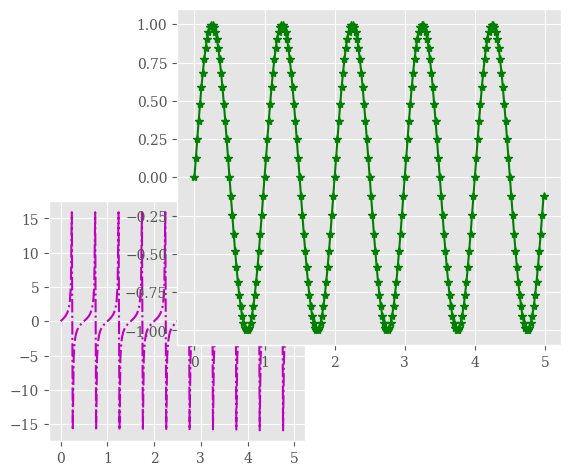

In [9]:
plt.figure()
ax1 = plt.axes([0.2, 0.3, 0.4, 0.5])
ax1.plot(t2, np.tan(2*np.pi*t2), 'm-.')

ax2 = plt.axes([0.4, 0.5, 0.6, 0.7])
ax2.plot(t2, np.sin(2*np.pi*t2), 'g*-')
plt.show()

## Trabalhando com texto

A função `Axes.text()` permite adicionar um texto arbitrário em qualquer lugar do `Axes`. Veja que a posição do texto está nas mesmas unidades dos dados. Aproveitamos para ver como fazer histogramas, com a função `Axes.hist()`.

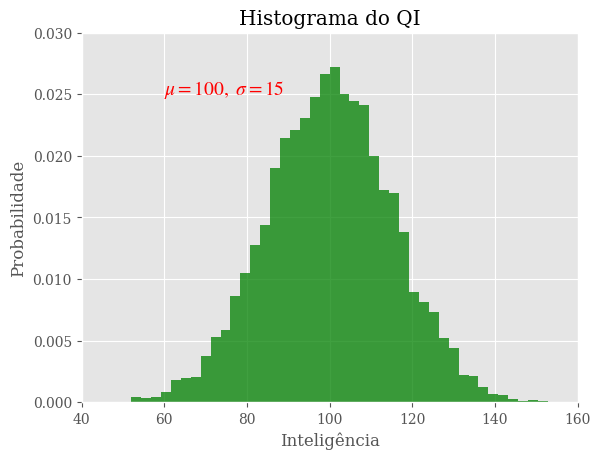

In [10]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

fig, ax = plt.subplots()

# histograma dos dados, 5 caixas entre 40 e 160
n, bins, patches = ax.hist(x, bins=50, range=[40, 160],
                           density=1, facecolor='g', alpha=0.75)


ax.set_xlabel('Inteligência')
ax.set_ylabel('Probabilidade')
ax.set_title('Histograma do QI')
ax.text(60, .025, r'$\mu=100,\ \sigma=15$', fontsize=14, color='red')
ax.axis([40, 160, 0, 0.03])
ax.grid(True)

plt.show()

Em qualquer função que atua em texto (`set_title()`, `set_xlabel()`, etc.), podemos modificar as propriedades do texto com kwargs, como feito na linha `plt.text(50, .025, r'$\mu=100,\ \sigma=15$', fontsize=14, color='red')`. [Veja a lista de propriedades de texto](https://matplotlib.org/stable/tutorials/text/text_props.html).

### Usando expressões matemáticas em texto

O matplotlib aceita expressões matemáticas em LaTeX em qualquer lugar que vá texto.
Por exemplo, para escrever a expressão $\sigma_i = 15$ no título de um plot, podemos escrever uma expressão LaTeX cercada por símbolos `$`.

```python
ax.set_title(r'$\sigma_i=15$')
```

A letra `r` antes da string é importante. Normalmente o Python traduz sequências qu começam com `\`, como `\n`, dentro de uma string para "caracteres invisíveis" (neste caso, um salto de linha). Usando `r'...'`, impedimos esta tadução. Isso é necessário porque muitos comandos em LaTeX começam com caractere `\`.
Veja em detalhes como escrever [expressões matemáticas com matplotlib e LaTeX](https://matplotlib.org/stable/tutorials/text/mathtext.html).


### Fazendo anotações de texto

Usando `Axes.text()` posiciona o texto em uma posição arbitrária nos eixos. Normalmente usamos texto para fazer anotações em alguma parte de um gráfico. Podemos usar a função `Axes.annotate()` para fazer anotações facilmente. Precisamos apenas indicar o local que estamos querendo anotar (argumento `xy`), e a posição do texto (argumento `xytext`). Ambos devem ser tuplas do tipo `(x, y)`.

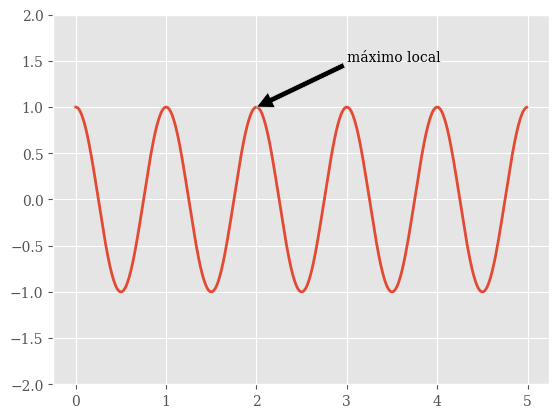

In [11]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
fig, ax = plt.subplots()
ax.plot(t, s, lw=2)

ax.annotate('máximo local', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black'))

ax.set_ylim(-2, 2)
plt.show()

Existem várias formas de fazer anotações, veja em mais detalhes no [tutorial de anotações](https://matplotlib.org/stable/tutorials/text/annotations.html#annotations-tutorial).

### Legendas

Quando fazemos gráficos com vários plots, podemos usar legendas para identificar cada um deles. Para isso, devemos adicionar o argumento `label='legenda'` a cada chamada a `Axes.plot()`. Ao final, basta chamar `Axes.legend()` para adicionar a legenda. Exemplo:

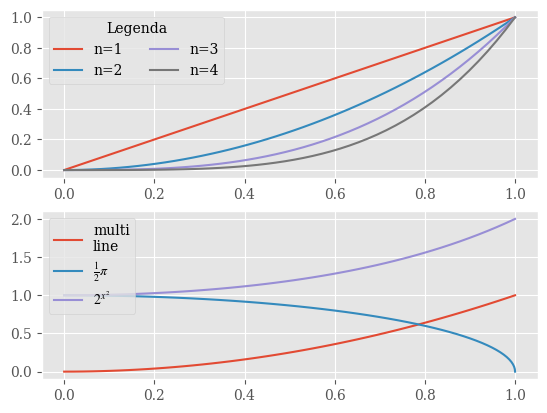

In [12]:
x = np.linspace(0, 1)

fig, axes = plt.subplots(nrows=2, ncols=1)
# Quebra o array axes nos dois itens ax0 e ax1
ax0, ax1 = axes

# Plotar as linhas y = x**n para n = 1 a 4.
for n in range(1, 5):
    ax0.plot(x, x**n, label="n={0}".format(n))

# loc='upper left' posiciona a legenda no canto
# superior esquerdo.
leg = ax0.legend(loc='upper left', ncol=2, title='Legenda')

# Legendas mais complexas.
ax1.plot(x, x**2, label='multi\nline')
half_pi = np.linspace(0, np.pi / 2)
ax1.plot(np.sin(half_pi), np.cos(half_pi), label=r'$\frac{1}{2}\pi$')
ax1.plot(x, 2**(x**2), label="$2^{x^2}$")
ax1.legend()

plt.show()

## Eixos logarítmicos e outras escalas não-lineares

O matplotlib suporta, além da escala linear padrão, escalas logarítmica e logit. Geralmente se usa essas outras escalas quando os dados cobrem várias ordens de magnitude. Para mudar a escala do eixo x, fazemos

```python
ax.set_xscale('log')
```

O exemplo abaixo mostra vários plots com escalas diferentes no eixo y para os mesmos dados.

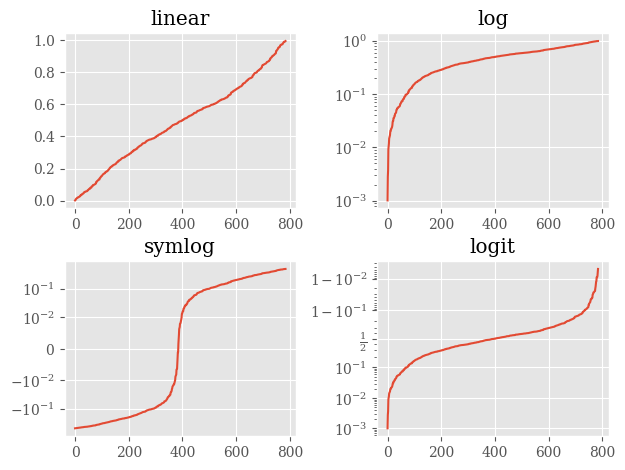

In [13]:
from matplotlib.ticker import NullFormatter  # usado para a escala `logit`

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot com várias escalas
fig, axes = plt.subplots(nrows=2, ncols=2)

# linear
ax = axes[0, 0]
ax.plot(x, y)
ax.set_yscale('linear')
ax.set_title('linear')
ax.grid(True)

# log
ax = axes[0, 1]
ax.plot(x, y)
ax.set_yscale('log')
ax.set_title('log')
ax.grid(True)

# log simétrico
ax = axes[1, 0]
ax.plot(x, y - y.mean())
ax.set_yscale('symlog', linthresh=0.01)
ax.set_title('symlog')
ax.grid(True)

# logit
ax = axes[1, 1]
ax.plot(x, y)
ax.set_yscale('logit')
ax.set_title('logit')
ax.grid(True)
# O retículo do eixo y fica muito fino, esta linha
# desabilita as etiquetas secundárias.
ax.yaxis.set_minor_formatter(NullFormatter())

# Ajusta espaçamento e a posição dos subplots
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
plt.show()

#### Exercício

Faça dois subplots um acima do outro. No superior, faça o gráfico de $x^n$, com $1 < x < 2$, para $n = 1, 2, 3, 4, 5$. Repita o gráfico no subplot inferior, porém use a escala logarítmica nos eixos $x$ e $y$. Escreva as etiquetas nos eixos, coloque legendas e título no gráfico.

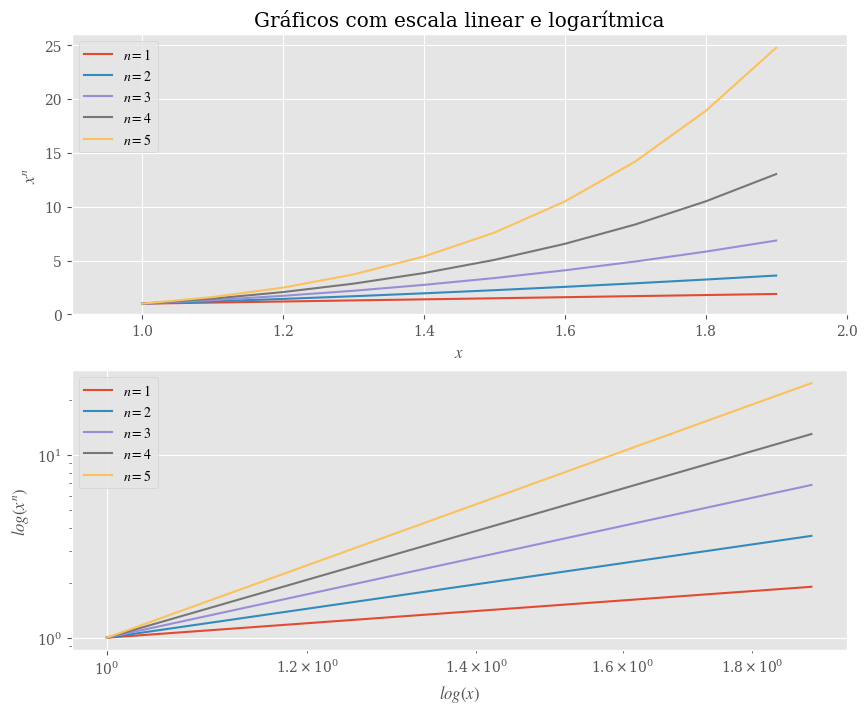

In [14]:
from pickle import TRUE
def f(x,t):
  return x**t

x = np.arange(1,2,0.1)

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,8))

# gráfico 1
ax1 = axes[0]
for i in range(1,6,1):
  ax1.plot(x,f(x,i), label = f"$n = {i}$")

ax1.axis([0.90,2,0,26])
ax1.legend()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$x^{n}$")
ax1.set_title("Gráficos com escala linear e logarítmica")

# gráfico 2
ax2 = axes[1]
for i in range(1,6,1):
  ax2.plot(x,f(x,i), label = f"$n = {i}$")

ax2.legend()
ax2.set_xlabel("$log(x)$")
ax2.set_ylabel("$log(x^{n})$")
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.grid(True)

## Plotando imagens

Quando trabalhando com dados bidimensionais, podemos fazer plots em forma de mapas de cor. No exemplo abaixo, `z` é um array bidimensional dado por

$$
z(x, y) = 2 \left\{ \exp \left[-x^2 - y^2\right] - \exp \left[-(x - 1)^2 - (y - 1)^2\right] \right\}.
$$

Faremos um mapa de cores desta função, na região $-3 < x \leq 3$ e $-3 < y \leq 3$, com amostragem de $\Delta x = \Delta y = 0.025$. A função `np.meshgrid()` gera um retículo retangular dado pelos arrays nas variáveis `x` e `y`. Isto é, se `x` tem 240 elementos (`len(x) == 240`), `xx` é um array bidimensional de 240 $\times$ 240 elementos. Vamos usar a função `Axes.imshow()` para plotar um mapa de cores.

Apenas um parêntesis. É possível especificar se a origem do array (`z[0, 0]`) corresponde ao canto superior esquerdo (`origin='upper'`) ou canto inferior esquerdo (`origin='lower'`). Em geral, quando trabalhamos com coordenadas cartesianas, queremos o segundo caso. Também é possível definir a faixa de valores dos eixos x e y usando `extent=[x1, x2, y1, y2]`. A faixa de valores das cores é definida através dos argumentos `vmin=` e `vmax=`. Assim, temos

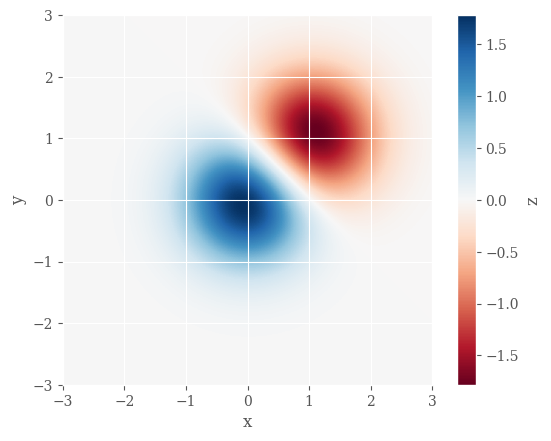

In [15]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
xx, yy = np.meshgrid(x, y)
z1 = np.exp(-xx**2 - yy**2)
z2 = np.exp(-(xx - 1)**2 - (yy - 1)**2)
z = (z1 - z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(z, cmap='RdBu', origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(z).max(), vmin=-abs(z).max())
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(im, label='z')
plt.show()

o argumento `cmap` é o [mapa de cor](https://matplotlib.org/stable/tutorials/colors/colormaps.html) utilizado. Também podemos fazer curvas de nível da função $z(x, y)$ usando as funções `Axes.contour()` que age sobre o array bidimensional criado anteriormente, `z`. `Axes.clabel()` desenha etiquetas nos contornos.

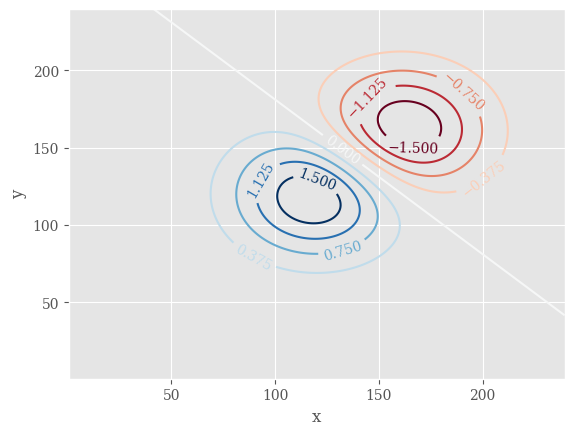

In [16]:
levels = np.linspace(-1.5, 1.5, 9)
fig, ax = plt.subplots()
cs = ax.contour(z, levels=levels, origin='lower', cmap='RdBu')
ax.clabel(cs, levels)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

[Mais exemplos de plots bidimensionais](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html).

## Scatter plots

Às vezes temos conjuntos de dados com muitas variáveis, e queremos ver como estas variáveis estão correlacionadas. Para isso, podemos usar a função `Axes.scatter()` para fazer gráficos de uma variável contra a outra, variando a cor (argumento `c`) e a área do marcador (argumento `s`). Esta é uma função bastante versátil, muito útil para trabalhar com dados experimentais. No exemplo abaixo, vamos fazer um gráfico que ilustra 4 variáveis.

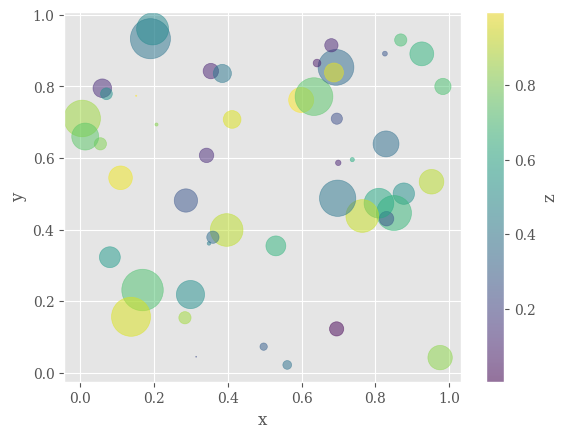

In [17]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
z = np.random.rand(N)
w = (30 * np.random.rand(N))**2  # este valor controla a área do marcador

fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=z, s=w, alpha=0.5, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(sc, label='z')

plt.show()

## Conclusão

Como dito no começo deste documento, o matplotlib é bastante versátil. É possível fazer virtualmente qualquer gráfico utilizando este pacote. O que vimos aqui foi apenas como fazer algum gráficos mais comuns, que já vão resolver a maior parte das nossas necessidades neste curso. Volte a este documento quando tiver dúvidas na hora de fazer gráficos para as nossas atividades.

## Exercício

A lei de Planck descreve a radiação emitida por um corpo negro em equilíbrio térmico a uma temperatura $T$. Como função do comprimento de onda $\lambda$, a lei de Planck é dada por

$$
B(\lambda, T) = \frac{2 h c^2}{\lambda^5} \frac{1}{\exp\left(\frac{hc}{\lambda k_\mathrm{B} T}\right) - 1}
$$

com $k_\mathrm{B} = 1.380649 \times 10^{-23}\, \mathrm{J}\,\mathrm{K}^{-1}$,
$h = 6.62607015 \times 10^{-34}\,\mathrm{J}\,\mathrm{s}$, e
$c = 299792458\,\mathrm{m}\,\mathrm{s}^{-1}$. As unidades de $B$ são $\mathrm{W}\,\mathrm{sr}^{-1}\,\mathrm{m}^{-3}$. Em um único painel (*axes*), faça o gráfico da lei de Planck na faixa de comprimentos de onda de $0.3$ até $3\,\mathrm{\mu m}$, para temperaturas de $3000$, $4000$, $6000$ e $10000\,\mathrm{K}$. Coloque etiquetas nos eixos, título e legenda no gráfico. Use escala logarítmica no eixo $y$.

**Atenção**: Use comprimentos de onda em metros para calcular $B$.

Text(0, 0.5, '$log\\mathrm{B}\\,(\\mathrm{W}\\,\\mathrm{sr}^{-1}\\,\\mathrm{m}^{-3})$')

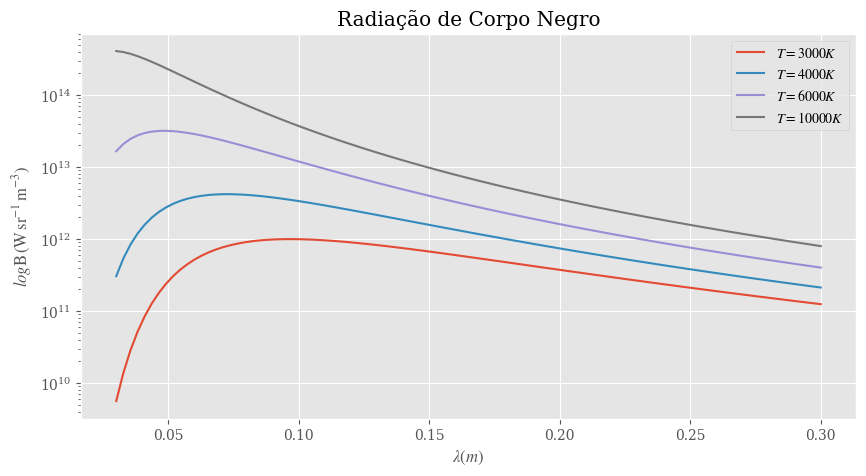

In [18]:
def Plancklaw(lamb,temp):
  # declarando constantes
  Kb = 1.380649e-23
  h = 6.62607015e-34
  c = 299792458

  a = ((2*h*c**2)/lamb**5)
  b = 1/((np.exp((h*c)/(lamb*Kb*temp)))-1)

  return a*b

# declarando intervalos de lambda
lamb_min = 0.3e-6
lamb_max = 3e-6
lamb_metros = np.linspace(lamb_min, lamb_max, 100)

# lista com as temperaturas
temperaturas = np.array([3000,4000,6000,10000])

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))

# cálculo de B
for i in range(len(temperaturas)):

  B_list = []

  for j in range(len(lamb_metros)):

    B = Plancklaw(lamb_metros[j],temperaturas[i])
    B_list.append(B)
    
  ax.plot(lamb_metros / 10e-6,B_list, label = f"$T = {temperaturas[i]}K$")
  B_list.clear()

# axes
ax.set_yscale("log")
ax.legend()
ax.set_title("Radiação de Corpo Negro")
ax.set_xlabel("$\lambda (m)$")
ax.set_ylabel("$log\mathrm{B}\,(\mathrm{W}\,\mathrm{sr}^{-1}\,\mathrm{m}^{-3})$")